In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
# Load dataset
dataset_path = '/kaggle/input/coffeepata'
train_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="training", seed=123, image_size=(224, 224), batch_size=32)
val_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="validation", seed=123, image_size=(224, 224), batch_size=32)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.2334 - loss: 3.8483 - val_accuracy: 0.2537 - val_loss: 1.9147
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.3893 - loss: 1.7301 - val_accuracy: 0.3433 - val_loss: 1.8355
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.4875 - loss: 1.4449 - val_accuracy: 0.4279 - val_loss: 1.6048
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5844 - loss: 1.2499 - val_accuracy: 0.5174 - val_loss: 1.5119
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6933 - loss: 0.8828 - val_accuracy: 0.5224 - val_loss: 1.4139
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7920 - loss: 0.6405 - val_accuracy: 0.5323 - val_loss: 1.7601
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8316 - loss: 0.5489 - val_accuracy: 0.5224 - val_loss: 1.9728
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9036 - loss: 0.3051 - val_accuracy: 0.4726 - 

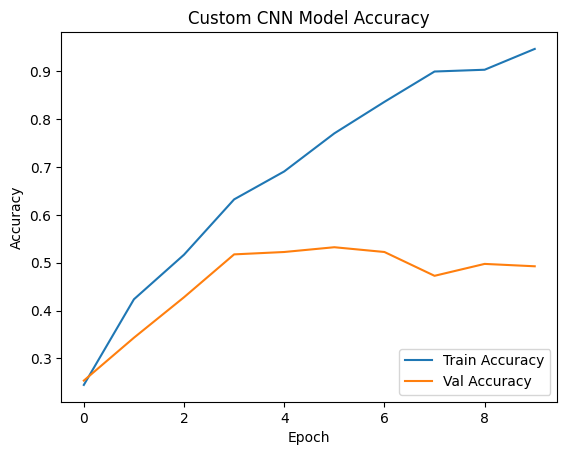

In [11]:
# Define Custom CNN Model
def create_custom_cnn():
    model = models.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),  # Use Input layer explicitly
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # Assuming 10 classes
    ])
    return model

custom_cnn = create_custom_cnn()
custom_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Custom CNN Model
checkpoint_cnn = ModelCheckpoint('custom_cnn_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = custom_cnn.fit(train_dataset, epochs=100, validation_data=val_dataset, callbacks=[checkpoint_cnn, early_stop_cnn])

# Plot training and validation accuracy for Custom CNN Model
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Custom CNN Model Accuracy')
plt.show()

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.2966 - loss: 2.1042 - val_accuracy: 0.1144 - val_loss: 2.2986
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.4180 - loss: 1.6749 - val_accuracy: 0.1493 - val_loss: 2.2929
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.4726 - loss: 1.4442 - val_accuracy: 0.1144 - val_loss: 2.2864
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.4660 - loss: 1.3931 - val_accuracy: 0.1144 - val_loss: 2.2896
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.5245 - loss: 1.2874 - val_accuracy: 0.1493 - val_loss: 2.2707
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.5750 - loss: 1.1549 - val_accuracy: 0.1493 - val_loss: 2.2749
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.5371 - loss: 1.1658 - val_accuracy: 0.1144 - val_loss: 2.2976
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.6134 - loss: 1.0568 - val_accuracy: 0.

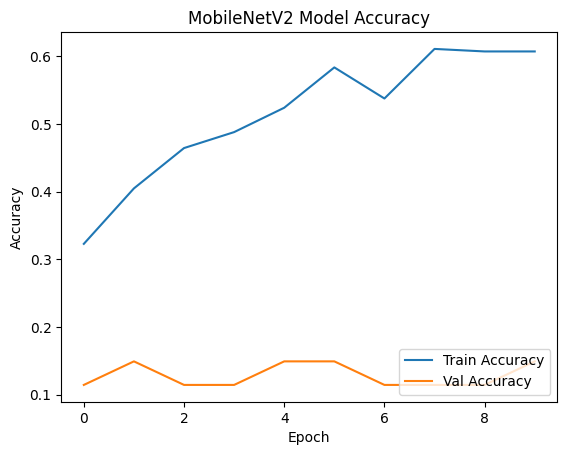

In [15]:
# Define MobileNetV2 Model without Pre-trained Weights
mobilenet = MobileNetV2(weights=None, input_shape=(224, 224, 3), include_top=False)
mobilenet.trainable = True  # Train the entire model

# Add custom layers on top
model_mobilenet = models.Sequential([
    mobilenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MobileNetV2 Model
checkpoint_mobilenet = ModelCheckpoint('mobilenet_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_mobilenet = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mobilenet = model_mobilenet.fit(train_dataset, epochs=100, validation_data=val_dataset, callbacks=[checkpoint_mobilenet, early_stop_mobilenet])

# Plot training and validation accuracy for MobileNetV2 Model
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('MobileNetV2 Model Accuracy')
plt.show()

In [13]:
# Evaluate both models
custom_cnn_loss, custom_cnn_accuracy = custom_cnn.evaluate(val_dataset)
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(val_dataset)

print(f"Custom CNN Model - Loss: {custom_cnn_loss}, Accuracy: {custom_cnn_accuracy}")
print(f"MobileNetV2 Model - Loss: {mobilenet_loss}, Accuracy: {mobilenet_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - accuracy: 0.5426 - loss: 1.4502
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 549ms/step - accuracy: 0.1171 - loss: 2.2853
Custom CNN Model - Loss: 1.413878083229065, Accuracy: 0.5223880410194397
MobileNetV2 Model - Loss: 2.2887978553771973, Accuracy: 0.09950248897075653


Custom CNN Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


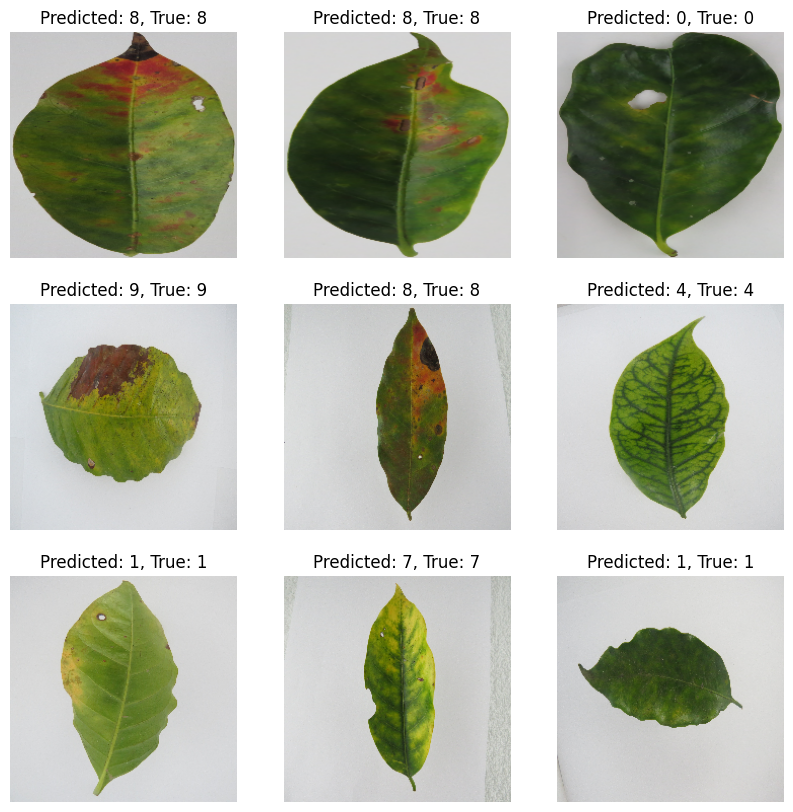

MobileNetV2 Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


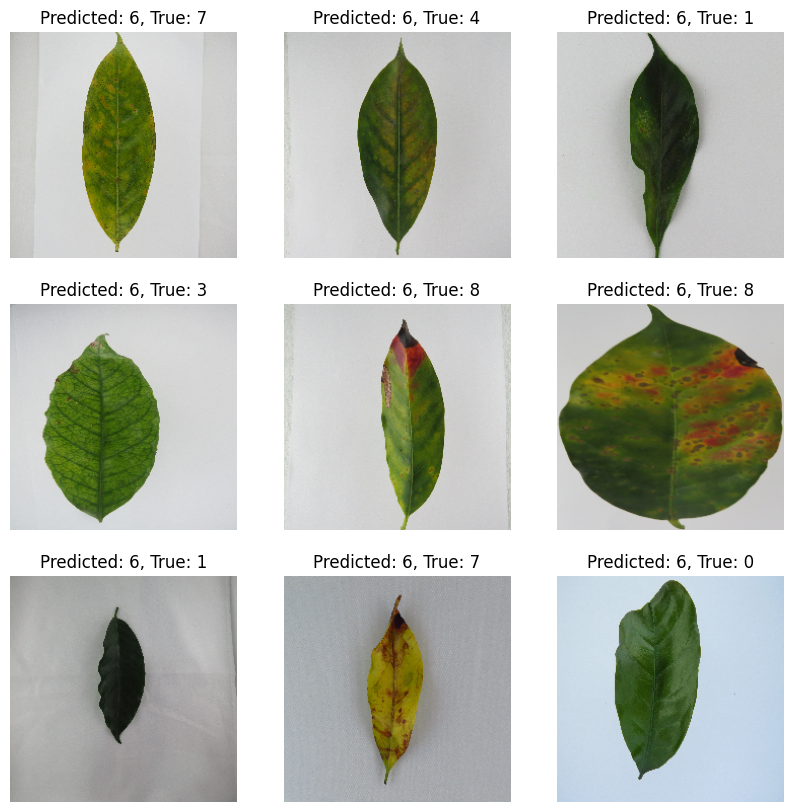

In [14]:
# Visualize some predictions
def plot_predictions(model, dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(9):
            plt.subplot(3, 3, i+1)
            image = images[i].numpy()
            image = (image * 255).astype(np.uint8)  # Scale back to [0, 255] range
            plt.imshow(image)
            plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {labels[i].numpy()}")
            plt.axis("off")
    plt.show()

print("Custom CNN Model Predictions:")
plot_predictions(custom_cnn, val_dataset)

print("MobileNetV2 Model Predictions:")
plot_predictions(model_mobilenet, val_dataset)